In [1]:
# %% [code]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Step 1: Load the Dataset

In [2]:
# %% [code]
# Load the dataset
df = pd.read_csv('diabetes.csv')

# Display the first 5 rows to check the data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Step 2: Explore the Dataset

In [3]:
# %% [code]
# Check data types
df.info()

# Get statistical summary
# LOOK AT THE MIN ROW: Glucose min=0 is an error we need to fix
df.describe()

# Check how many Diabetic (1) vs Non-Diabetic (0) cases we have
print(df['Outcome'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Outcome
0    500
1    268
Name: count, dtype: int64


Step 3: Clean the Data (CRITICAL STEP)

In [4]:
# %% [code]
# Replace 0 with NaN in columns where 0 is not biologically possible
# (Note: Pregnancies can legitimately be 0, so we exclude it)
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# Fill missing values (NaN) with the mean of that column
df.fillna(df.mean(), inplace=True)

# Verify the cleanup (min values should no longer be 0)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Step 4: Visualize the Data

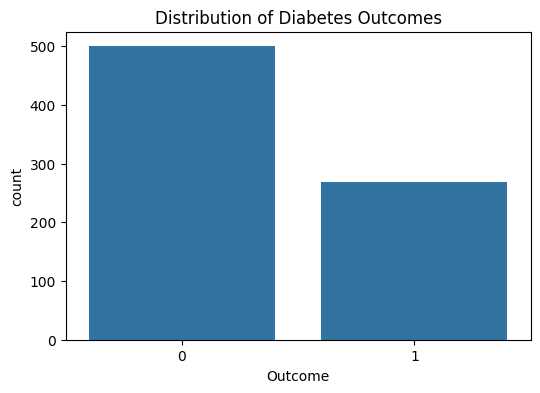

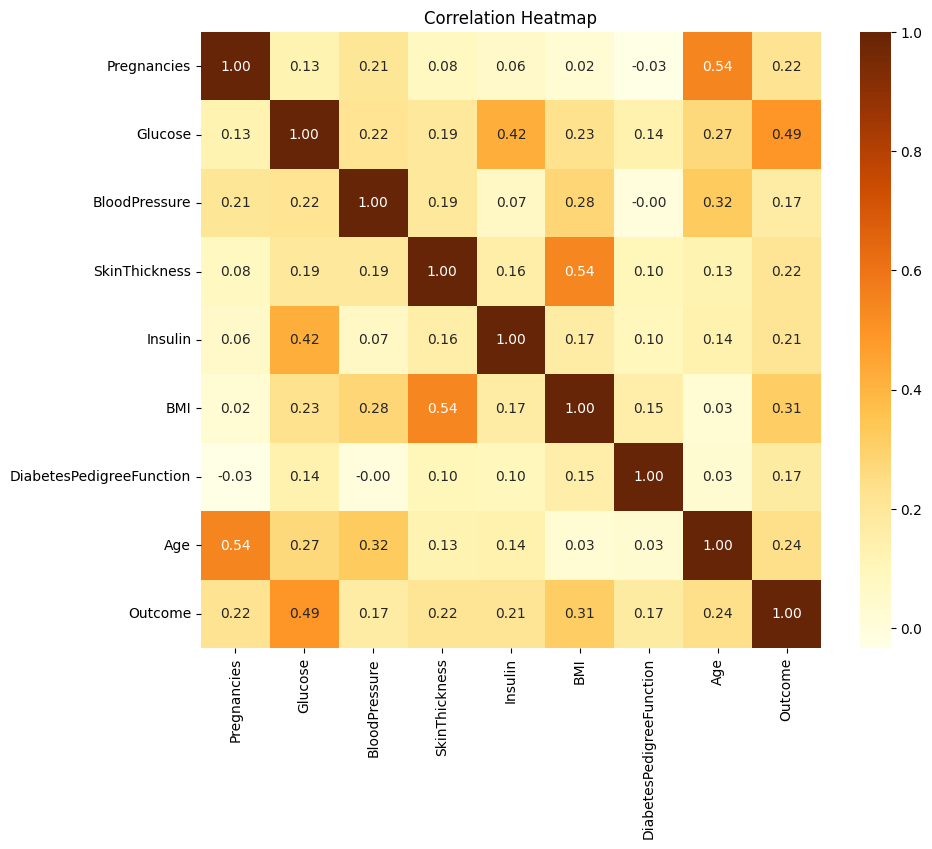

In [5]:
# %% [code]
# Visualize the count of Outcome (0 vs 1)
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcomes')
plt.show()

# Visualize correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='YlOrBr', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Step 5: Preprocess the Data

In [6]:
# %% [code]
# Split features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (614, 8)
Testing shape: (154, 8)


Step 6: Train a Machine Learning Model

In [7]:
# %% [code]
# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


Step 7: Evaluate the Model

In [8]:
# %% [code]
# Make predictions
y_pred = model.predict(X_test)

# Print accuracy and detailed report
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 75.32%

Confusion Matrix:
[[82 17]
 [21 34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



Step 8: Test with a Specific Case

In [10]:
# %% [code]
# Define the column names to match the training data
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create a DataFrame for the new patient instead of a simple array
# Example: High Glucose (160), High BMI (35), Age 50
new_patient = pd.DataFrame([[2, 160, 70, 30, 150, 35.0, 0.5, 50]], columns=columns)

# Scale the input (No warning now, because columns match!)
new_patient_scaled = scaler.transform(new_patient)

# Predict
prediction = model.predict(new_patient_scaled)
probability = model.predict_proba(new_patient_scaled)

if prediction[0] == 1:
    print(f"Prediction: Diabetic (Probability: {probability[0][1]*100:.2f}%)")
else:
    print(f"Prediction: Non-Diabetic (Probability: {probability[0][0]*100:.2f}%)")

Prediction: Diabetic (Probability: 78.36%)


Part 1: Plotting Your Model Results

1. Confusion Matrix Heatmap

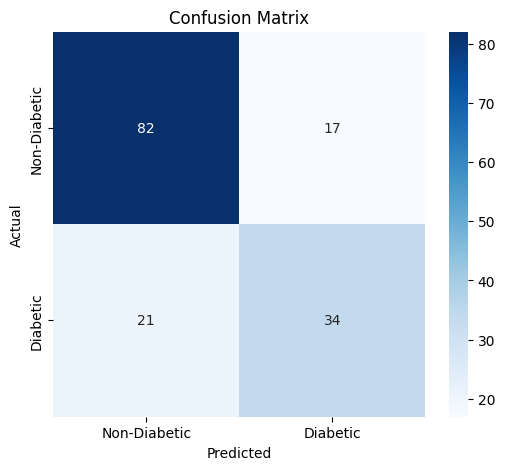

In [11]:
# %% [code]
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

2. ROC Curve

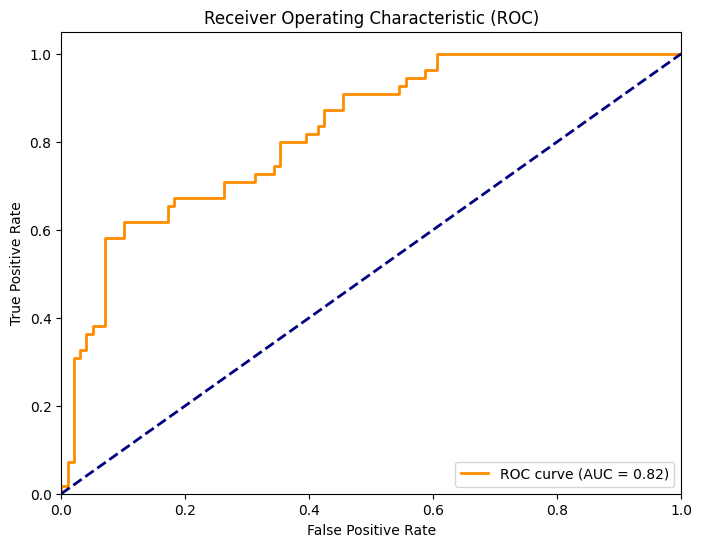

In [12]:
# %% [code]
from sklearn.metrics import roc_curve, auc

# Get probabilities for the positive class (Diabetic)
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

3. Feature Importance

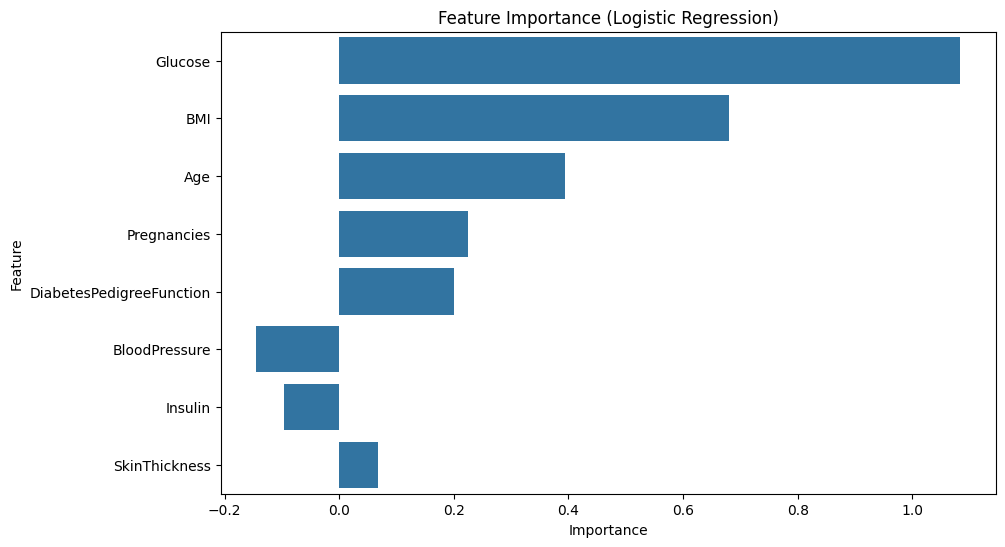

In [13]:
# %% [code]
# Get feature names
feature_names = X.columns

# Get coefficients from Logistic Regression
coefficients = model.coef_[0]

# Create DataFrame
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})
feature_importance['Abs_Importance'] = feature_importance['Importance'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance (Logistic Regression)')
plt.show()

Part 2: Advancements

Advancement 1: Use Random Forest (Usually Better Accuracy)

In [14]:
# %% [code]
from sklearn.ensemble import RandomForestClassifier

# 1. Initialize Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Train
rf_model.fit(X_train, y_train)

# 3. Evaluate
rf_pred = rf_model.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred) * 100:.2f}%")

# Compare with Logistic Regression
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 75.32%

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

